# Analysis of Sheltered Data From 2015-2023
Further data/questions to look at: Has funding or creation of new programs effected the changes? For instance, have Safe Havens become a replacement for previous Transitional Housing cases?   

In [79]:
#Import necessary libraries 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [80]:
#Define path to CSV data file 
# Read in CSV file

sheltered_status_data = pd.read_csv("HUD_PIP_Data.csv")
sheltered_status_data.head()

,State,Number of CoCs,Overall Homeless,Sheltered ES Homeless,Sheltered TH Homeless,Sheltered Total Homeless,Unsheltered Homeless,Overall Homeless Individuals,Sheltered ES Homeless Individuals,Sheltered TH Homeless Individuals,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
0,AK,2.0,1642.0,898.0,489.0,1387.0,255.0,1062.0,618.0,273.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,8.0,5452.0,1452.0,2344.0,3796.0,1656.0,4184.0,1210.0,1613.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AR,9.0,3836.0,1251.0,1034.0,2285.0,1551.0,2987.0,985.0,781.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AS,0.0,,,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AZ,3.0,14646.0,3934.0,4684.0,8618.0,6028.0,10020.0,2412.0,2011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
sheltered_status_data.describe

<bound method NDFrame.describe of                                                  State  Number of CoCs  \
0                                                   AK             2.0   
1                                                   AL             8.0   
2                                                   AR             9.0   
3                                                   AS             0.0   
4                                                   AZ             3.0   
..                                                 ...             ...   
982                                                 WV             4.0   
983                                                 WY             1.0   
984                                              Total           385.0   
985                                                NaN             NaN   
986  *File does not contain the imputed ages for pe...             NaN   

    Overall Homeless Sheltered ES Homeless Sheltered TH Homeless  \
0        

In [82]:
# Create a new table/dataframe that focuses on sheltered status (temp. housing vs. no housing) for only 2015-2023

sheltered_status_focused = sheltered_status_data[(sheltered_status_data['Year'] >= 2015) & (sheltered_status_data['Year'] <= 2023)]
sheltered_status_focused.head()

,State,Number of CoCs,Overall Homeless,Sheltered ES Homeless,Sheltered TH Homeless,Sheltered Total Homeless,Unsheltered Homeless,Overall Homeless Individuals,Sheltered ES Homeless Individuals,Sheltered TH Homeless Individuals,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
464,AK,2.0,1956.0,1127.0,512.0,1639.0,317.0,1342.0,792.0,292.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
465,AL,8.0,3970.0,1574.0,1349.0,2943.0,1027.0,2868.0,1146.0,910.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,AR,7.0,2560.0,1161.0,515.0,1678.0,882.0,1833.0,722.0,365.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467,AS,0.0,,,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,AZ,3.0,9896.0,3395.0,3504.0,6939.0,2957.0,6548.0,2147.0,1637.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
sheltered_status_focused.columns

Index(['State', 'Number of CoCs', 'Overall Homeless', 'Sheltered ES Homeless',
       'Sheltered TH Homeless', 'Sheltered Total Homeless',
       'Unsheltered Homeless', 'Overall Homeless Individuals',
       'Sheltered ES Homeless Individuals',
       'Sheltered TH Homeless Individuals',
       ...
       'Sheltered Total Homeless People in Families - Age 25 to 34',
       'Sheltered Total Homeless People in Families - Age 35 to 44',
       'Sheltered Total Homeless People in Families - Age 45 to 54',
       'Sheltered Total Homeless People in Families - Age 55 to 64',
       'Sheltered Total Homeless People in Families - Over 64',
       'Unsheltered Homeless People in Families - Age 25 to 34',
       'Unsheltered Homeless People in Families - Age 35 to 44',
       'Unsheltered Homeless People in Families - Age 45 to 54',
       'Unsheltered Homeless People in Families - Age 55 to 64',
       'Unsheltered Homeless People in Families - Over 64'],
      dtype='object', length=661)

In [84]:
# Create a new DataFrame containing only the specified states

states_to_include = ['HI','UT','CO','MA','CA','LA','ND','MS','IL','NM','AZ']
sheltered_status_focused.set_index('State', inplace=True)
state_specific_totals = sheltered_status_focused.loc[states_to_include]

# Display the filtered DataFrame
state_specific_totals

,Number of CoCs,Overall Homeless,Sheltered ES Homeless,Sheltered TH Homeless,Sheltered Total Homeless,Unsheltered Homeless,Overall Homeless Individuals,Sheltered ES Homeless Individuals,Sheltered TH Homeless Individuals,Sheltered Total Homeless Individuals,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
State,,,,,,,,,,,,,,,,,,,,,
HI,2.0,7620.0,1257.0,2494.0,3777.0,3843.0,4307.0,541.0,676.0,1243.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HI,2.0,7921.0,1226.0,2361.0,3613.0,4308.0,4590.0,647.0,609.0,1282.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HI,2.0,7220.0,1341.0,2054.0,3420.0,3800.0,4535.0,746.0,487.0,1258.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HI,2.0,6530.0,1528.0,1527.0,3055.0,3475.0,4131.0,832.0,383.0,1215.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HI,2.0,6412.0,1587.0,1185.0,2772.0,3640.0,4420.0,849.0,385.0,1234.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZ,3.0,10007.0,3437.0,1978.0,5475.0,4532.0,7538.0,2109.0,930.0,3099.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZ,3.0,10979.0,3483.0,1914.0,5458.0,5521.0,8280.0,1988.0,953.0,3002.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZ,3.0,5460.0,3822.0,1569.0,5460.0,0.0,3304.0,2396.0,839.0,3304.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
# Create DataFrame with only relevent columns Sheltered totals, types & Year

states_to_include = ['HI','UT','CO','MA','CA','LA','ND','MS','IL','NM','AZ']
state_specific_totals = sheltered_status_focused.loc[states_to_include]
state_specific_totals.reset_index(inplace=True)

yearly_change_df = state_specific_totals[['State', 'Sheltered Total Homeless', 'Sheltered ES Homeless', 'Sheltered TH Homeless', 'Sheltered SH Homeless', 'Year']]
yearly_change_df

,State,Sheltered Total Homeless,Sheltered ES Homeless,Sheltered TH Homeless,Sheltered SH Homeless,Year
0,HI,3777.0,1257.0,2494.0,26.0,2015
1,HI,3613.0,1226.0,2361.0,26.0,2016
2,HI,3420.0,1341.0,2054.0,25.0,2017
3,HI,3055.0,1528.0,1527.0,0.0,2018
4,HI,2772.0,1587.0,1185.0,0.0,2019
...,...,...,...,...,...,...
94,AZ,5475.0,3437.0,1978.0,60.0,2019
95,AZ,5458.0,3483.0,1914.0,61.0,2020
96,AZ,5460.0,3822.0,1569.0,69.0,2021
97,AZ,5526.0,3909.0,1546.0,71.0,2022


In [86]:
# Pivot the DataFrame to have each year as a separate column
yearly_change_pivot = yearly_change_df.pivot(index='State', columns='Year')

# Flatten the multi-level column index
yearly_change_pivot.columns = [f"{col[1]}_{col[0]}" for col in yearly_change_pivot.columns]

# Display the pivoted DataFrame
yearly_change_pivot

,2015_Sheltered Total Homeless,2016_Sheltered Total Homeless,2017_Sheltered Total Homeless,2018_Sheltered Total Homeless,2019_Sheltered Total Homeless,2020_Sheltered Total Homeless,2021_Sheltered Total Homeless,2022_Sheltered Total Homeless,2023_Sheltered Total Homeless,2015_Sheltered ES Homeless,...,2023_Sheltered TH Homeless,2015_Sheltered SH Homeless,2016_Sheltered SH Homeless,2017_Sheltered SH Homeless,2018_Sheltered SH Homeless,2019_Sheltered SH Homeless,2020_Sheltered SH Homeless,2021_Sheltered SH Homeless,2022_Sheltered SH Homeless,2023_Sheltered SH Homeless
State,,,,,,,,,,,,,,,,,,,,,
AZ,6939.0,6463.0,5781.0,5799.0,5475.0,5458.0,5460.0,5526.0,6622.0,3395.0,...,1454.0,40.0,40.0,36.0,40.0,60.0,61.0,69.0,71.0,64.0
CA,42039.0,39752.0,42636.0,40429.0,42846.0,47888.0,51429.0,56030.0,57976.0,22750.0,...,11297.0,161.0,126.0,126.0,217.0,270.0,215.0,220.0,317.0,568.0
CO,7134.0,7611.0,7081.0,6528.0,7431.0,6933.0,8016.0,7241.0,9694.0,3782.0,...,2252.0,24.0,46.0,25.0,22.0,35.0,50.0,32.0,28.0,46.0
HI,3777.0,3613.0,3420.0,3055.0,2772.0,2808.0,2490.0,2224.0,2316.0,1257.0,...,615.0,26.0,26.0,25.0,0.0,0.0,45.0,28.0,35.0,42.0
IL,10463.0,9736.0,8541.0,8701.0,8310.0,8153.0,6933.0,7311.0,10328.0,4684.0,...,2161.0,85.0,94.0,75.0,73.0,71.0,68.0,66.0,73.0,61.0
LA,2890.0,2853.0,2330.0,1994.0,1967.0,2020.0,1613.0,6138.0,1770.0,1306.0,...,355.0,39.0,43.0,37.0,36.0,38.0,74.0,31.0,39.0,37.0
MA,20542.0,18848.0,16574.0,19083.0,17642.0,16681.0,13944.0,14372.0,17779.0,17444.0,...,1325.0,46.0,41.0,77.0,80.0,69.0,60.0,100.0,103.0,71.0
MS,1141.0,889.0,753.0,731.0,698.0,581.0,359.0,435.0,538.0,523.0,...,138.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ND,819.0,707.0,758.0,494.0,545.0,507.0,474.0,527.0,608.0,640.0,...,112.0,0.0,0.0,0.0,0.0,30.0,19.0,16.0,17.0,12.0


In [96]:
# Redo previous DataFrame to display types of Sheltered House as a sub-row under corresponding State
# Convert relevant columns to numeric type
yearly_change_df[['Sheltered Total Homeless', 'Sheltered ES Homeless', 'Sheltered TH Homeless', 'Sheltered SH Homeless']] = yearly_change_df[['Sheltered Total Homeless', 'Sheltered ES Homeless', 'Sheltered TH Homeless', 'Sheltered SH Homeless']].apply(pd.to_numeric, errors='coerce')

# Separate DataFrames for each operation
val_df = yearly_change_df.copy()
mul2_df = yearly_change_df.copy()
div3_df = yearly_change_df.copy()

# Apply operations
mul2_df[['Sheltered Total Homeless', 'Sheltered ES Homeless', 'Sheltered TH Homeless', 'Sheltered SH Homeless']] *= 2
div3_df[['Sheltered Total Homeless', 'Sheltered ES Homeless', 'Sheltered TH Homeless', 'Sheltered SH Homeless']] /= 3

# Concatenate the DataFrames
result_df = pd.concat([val_df, mul2_df, div3_df])

# Sort the result DataFrame
result_df.sort_values(['State', 'Year'], inplace=True)

# Set the index to create a hierarchical index with State, Year
result_df.set_index(['State', 'Year'], inplace=True)

# Remove the 'level_0' and 'index' columns
result_df.drop(columns=['level_0', 'index'], inplace=True, errors='ignore')

# Display the result DataFrame
result_df

/var/folders/03/jr49d9l55y583dl7ztffjx1c0000gn/T/ipykernel_10736/209002254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_change_df[['Sheltered Total Homeless', 'Sheltered ES Homeless', 'Sheltered TH Homeless', 'Sheltered SH Homeless']] = yearly_change_df[['Sheltered Total Homeless', 'Sheltered ES Homeless', 'Sheltered TH Homeless', 'Sheltered SH Homeless']].apply(pd.to_numeric, errors='coerce')


Sheltered Total Homeless  Sheltered ES Homeless  \
State Year                                                    
AZ    2015               6939.000000            3395.000000   
      2015              13878.000000            6790.000000   
      2015               2313.000000            1131.666667   
      2016               6463.000000            3701.000000   
      2016              12926.000000            7402.000000   
...                              ...                    ...   
UT    2022               5368.000000            4438.000000   
      2022                894.666667             739.666667   
      2023               2707.000000            2237.000000   
      2023               5414.000000            4474.000000   
      2023                902.333333             745.666667   

            Sheltered TH Homeless  Sheltered SH Homeless  
State Year                                                
AZ    2015            3504.000000              40.000000  
      2015            7008.000000              80.000000  
      2015            1168.000000              13.333333  
      2016            2722.000000              40.000000  
      2016            5444.000000              80.000000  
...                           ...                    ...  
UT    2022             930.000000               0.000000  
      2022             155.000000               0.000000  
      2023             470.000000               0.000000  
      2023             940.000000               0.000000  
      2023             156.666667               0.000000  

[297 rows x 4 columns]

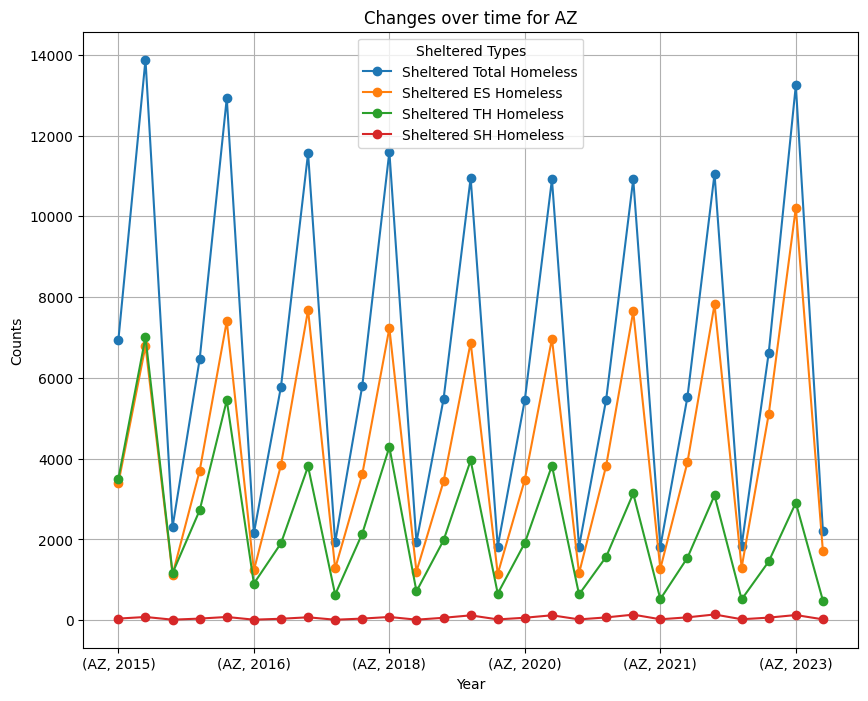

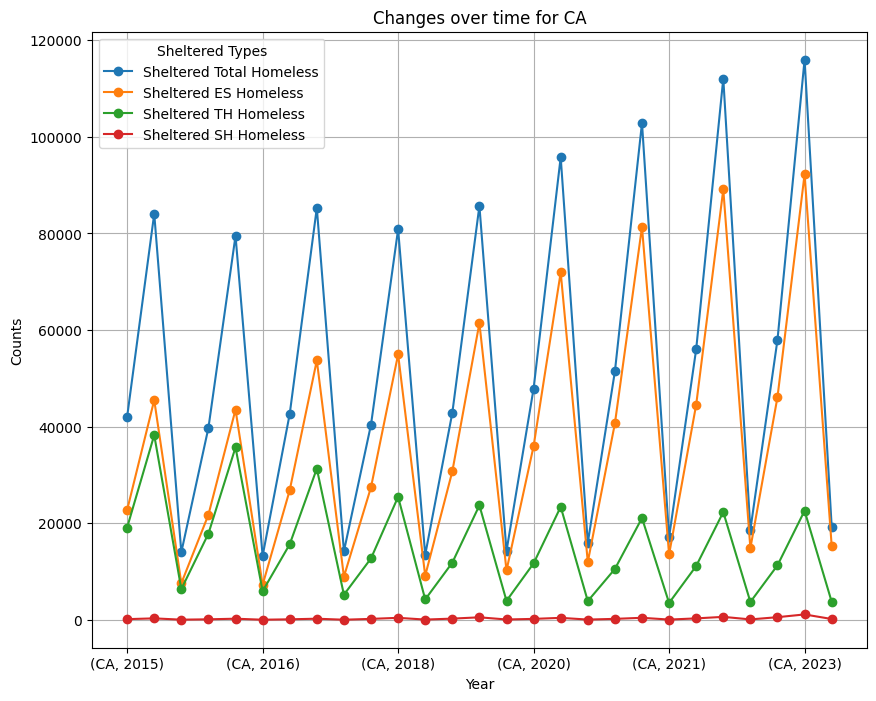

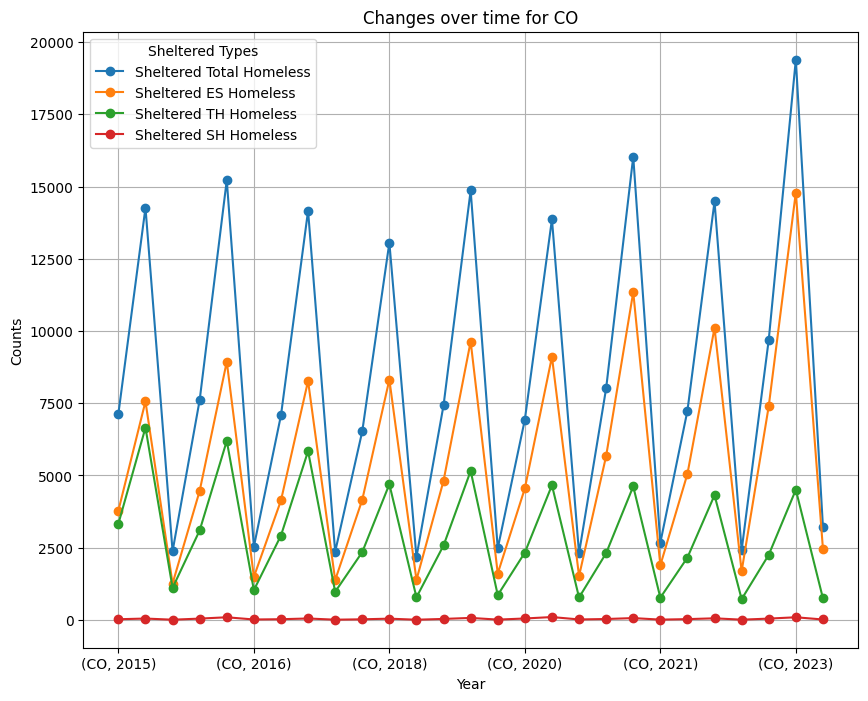

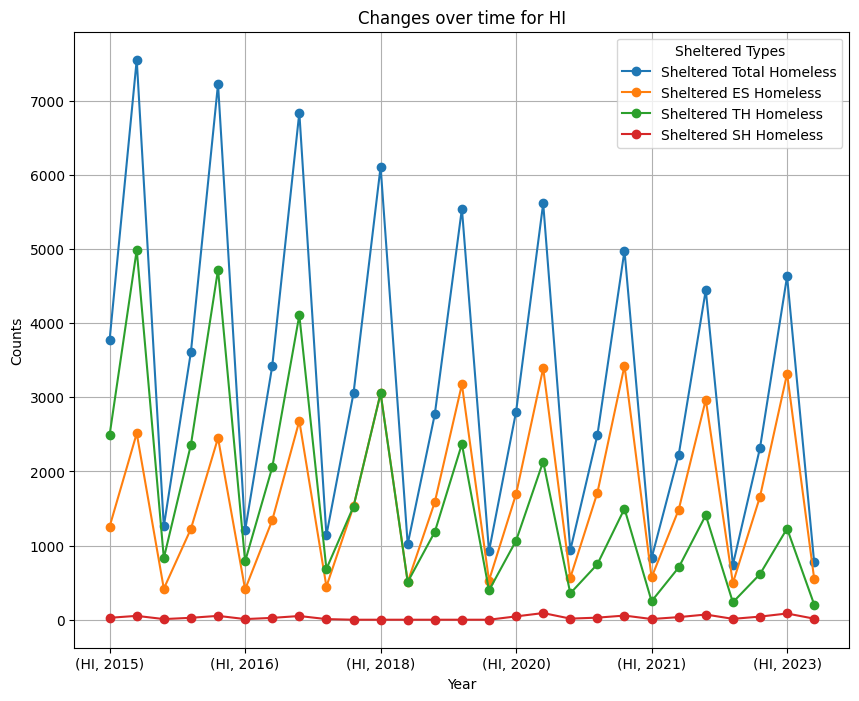

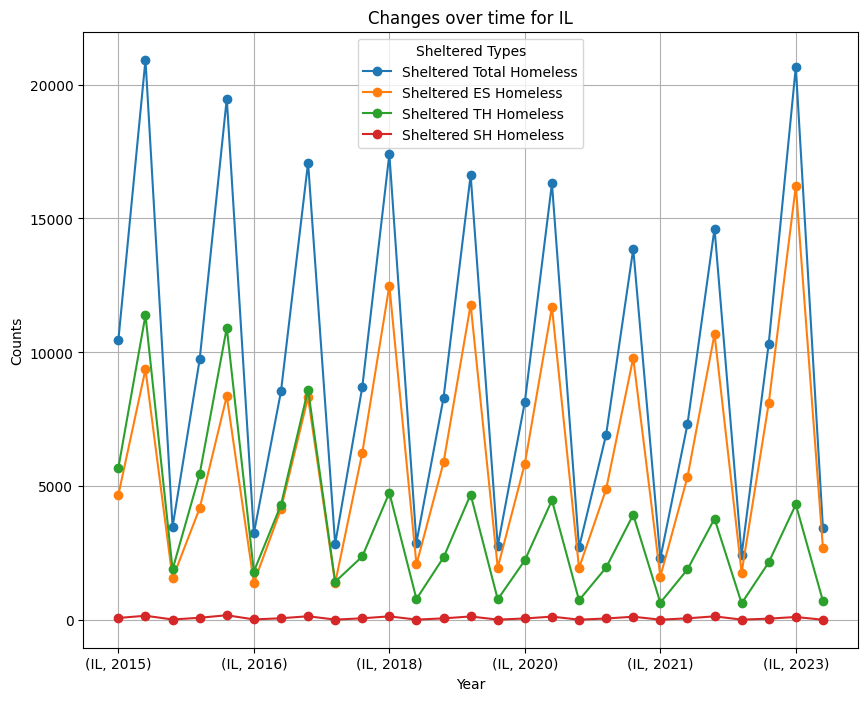

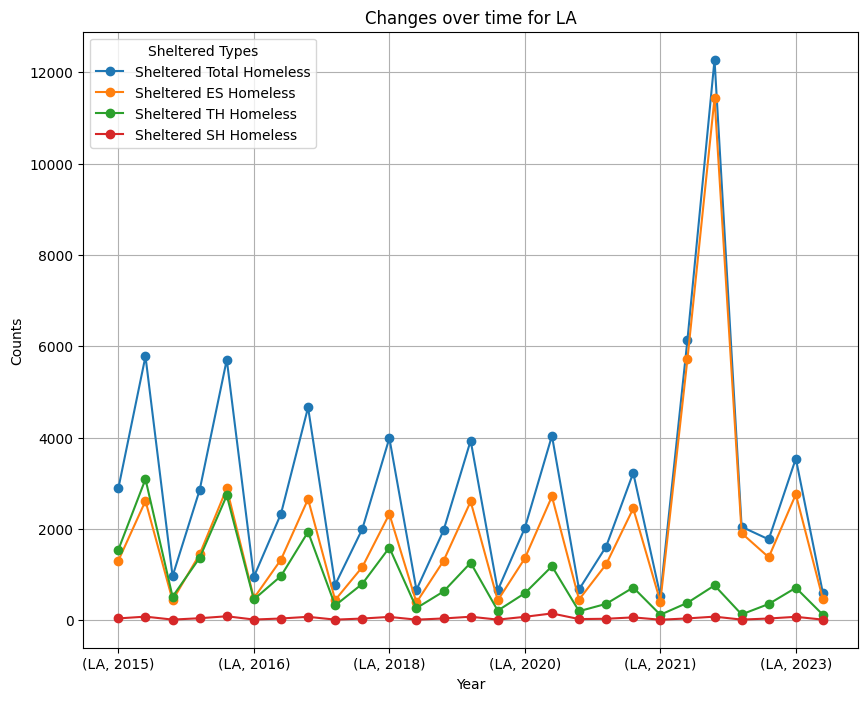

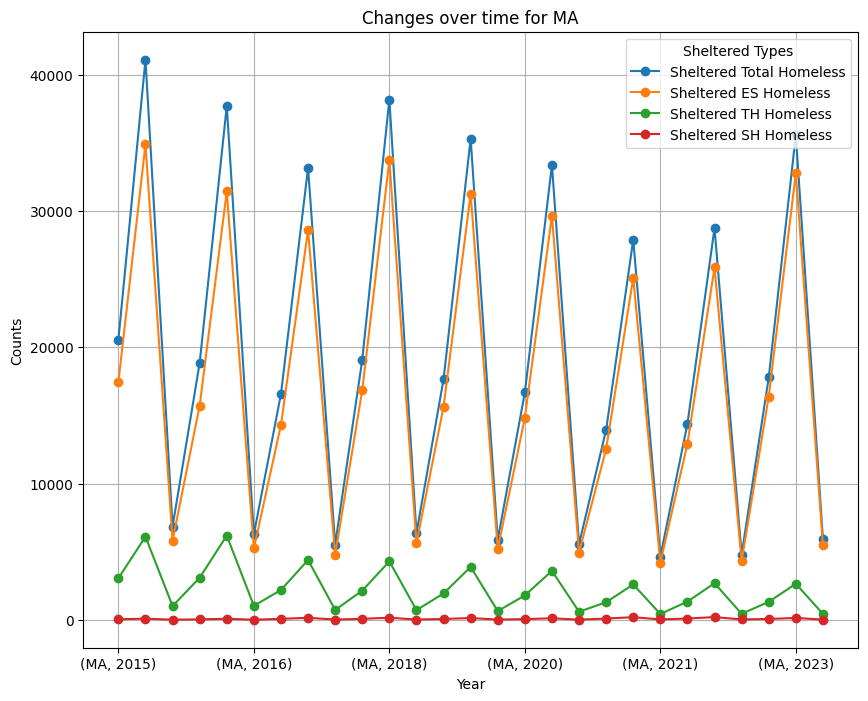

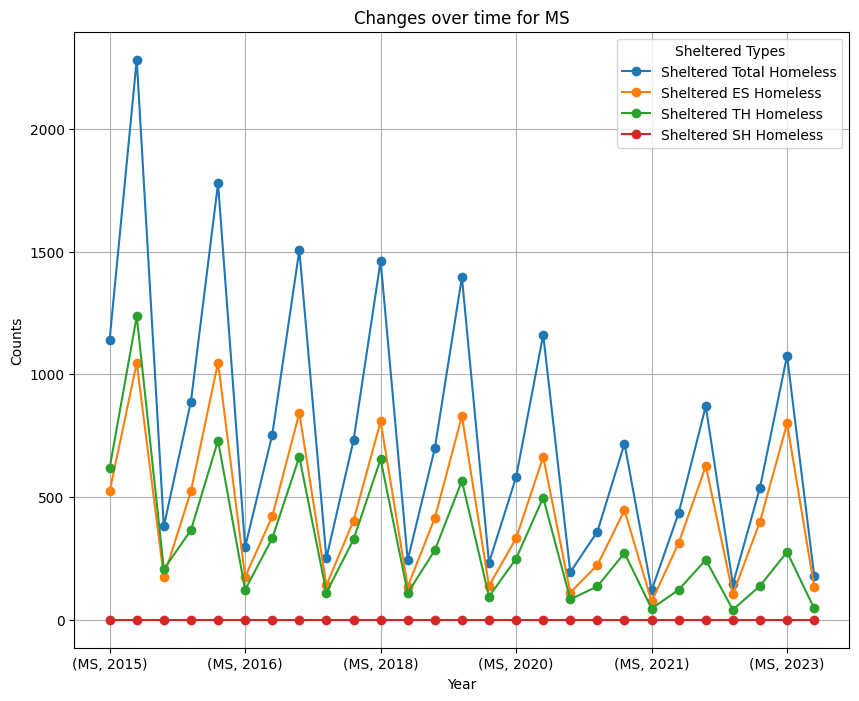

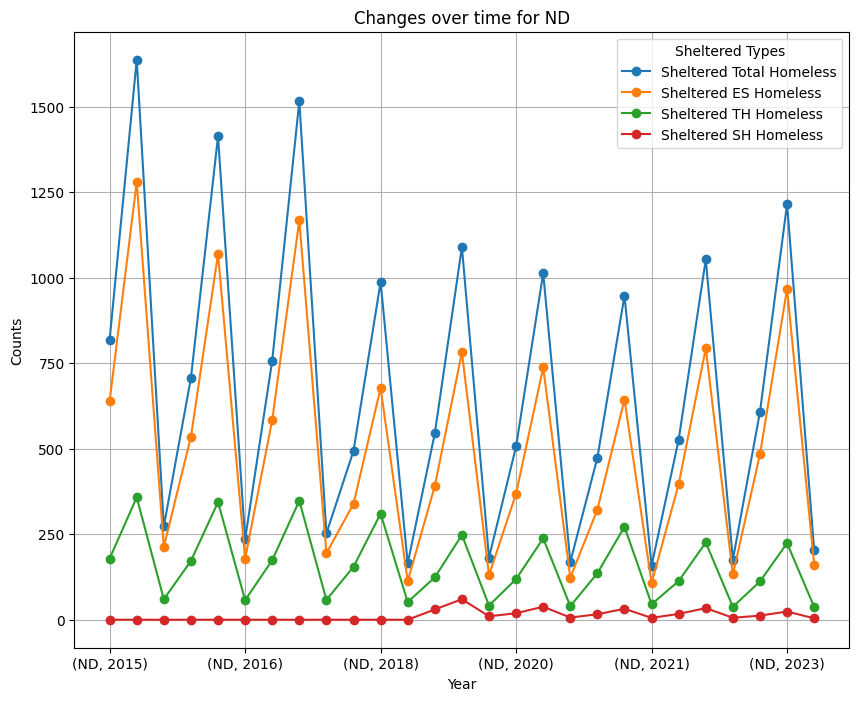

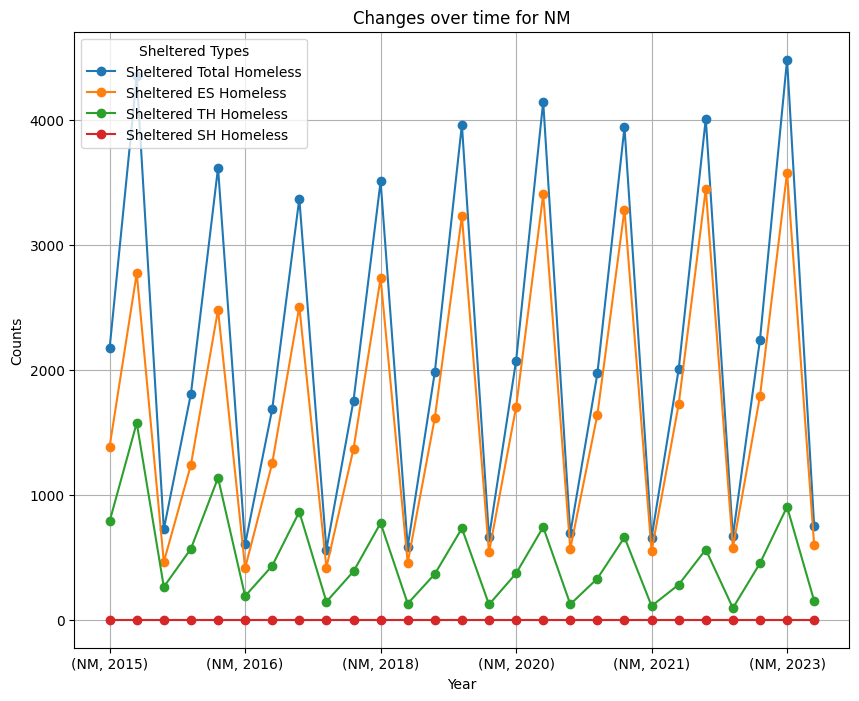

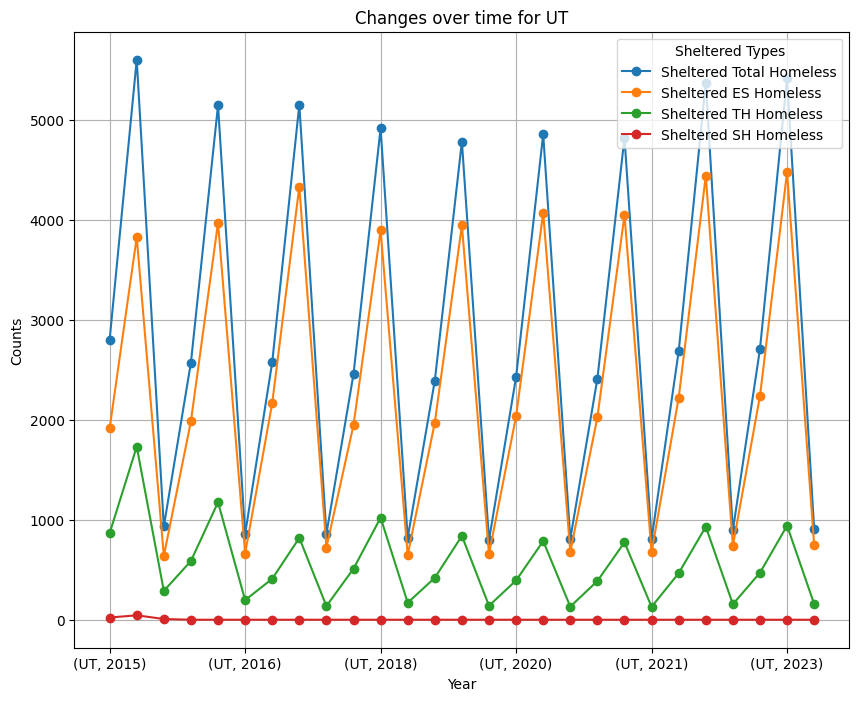

In [114]:
# Plot changes in unhoused counts within each Sheltered Housing over time for each selected state
# Iterate over each state and plot the changes over time
for state, data in result_df.groupby('State'):
    data.dropna().plot.line(figsize=(10, 8), title=f"Changes over time for {state}", marker='o')
    plt.xlabel('Year')
    plt.ylabel('Counts')
    plt.grid(True)
    plt.legend(title='Sheltered Types')
    plt.show()

In [122]:
# Clean previous DataFrame to remove "Sheltered Total Homeless" values in order to de-clutter previous line charts.
focused_yearly_change_df = state_specific_totals[['State', 'Sheltered ES Homeless', 'Sheltered TH Homeless', 'Sheltered SH Homeless', 'Year']]
focused_yearly_change_df

# Convert relevant columns to numeric type
focused_yearly_change_df[['Sheltered ES Homeless', 'Sheltered TH Homeless', 'Sheltered SH Homeless']] = focused_yearly_change_df[['Sheltered ES Homeless', 'Sheltered TH Homeless', 'Sheltered SH Homeless']].apply(pd.to_numeric, errors='coerce')

# Separate DataFrames for each operation
val_df = focused_yearly_change_df.copy()
mul2_df = focused_yearly_change_df.copy()
div3_df = focused_yearly_change_df.copy()

# Apply operations
mul2_df[['Sheltered ES Homeless', 'Sheltered TH Homeless', 'Sheltered SH Homeless']] *= 2
div3_df[['Sheltered ES Homeless', 'Sheltered TH Homeless', 'Sheltered SH Homeless']] /= 3

# Concatenate the DataFrames
focused_df = pd.concat([val_df, mul2_df, div3_df])

# Sort the result DataFrame
focused_df.sort_values(['State', 'Year'], inplace=True)

# Set the index to create a hierarchical index with State, Year
focused_df.set_index(['State', 'Year'], inplace=True)

# Remove the 'level_0' and 'index' columns
focused_df.drop(columns=['level_0', 'index'], inplace=True, errors='ignore')

# Display the result DataFrame
focused_df

/var/folders/03/jr49d9l55y583dl7ztffjx1c0000gn/T/ipykernel_10736/2242248.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focused_yearly_change_df[['Sheltered ES Homeless', 'Sheltered TH Homeless', 'Sheltered SH Homeless']] = focused_yearly_change_df[['Sheltered ES Homeless', 'Sheltered TH Homeless', 'Sheltered SH Homeless']].apply(pd.to_numeric, errors='coerce')


Sheltered ES Homeless  Sheltered TH Homeless  \
State Year                                                 
AZ    2015            3395.000000            3504.000000   
      2015            6790.000000            7008.000000   
      2015            1131.666667            1168.000000   
      2016            3701.000000            2722.000000   
      2016            7402.000000            5444.000000   
...                           ...                    ...   
UT    2022            4438.000000             930.000000   
      2022             739.666667             155.000000   
      2023            2237.000000             470.000000   
      2023            4474.000000             940.000000   
      2023             745.666667             156.666667   

            Sheltered SH Homeless  
State Year                         
AZ    2015              40.000000  
      2015              80.000000  
      2015              13.333333  
      2016              40.000000  
      2016              80.000000  
...                           ...  
UT    2022               0.000000  
      2022               0.000000  
      2023               0.000000  
      2023               0.000000  
      2023               0.000000  

[297 rows x 3 columns]

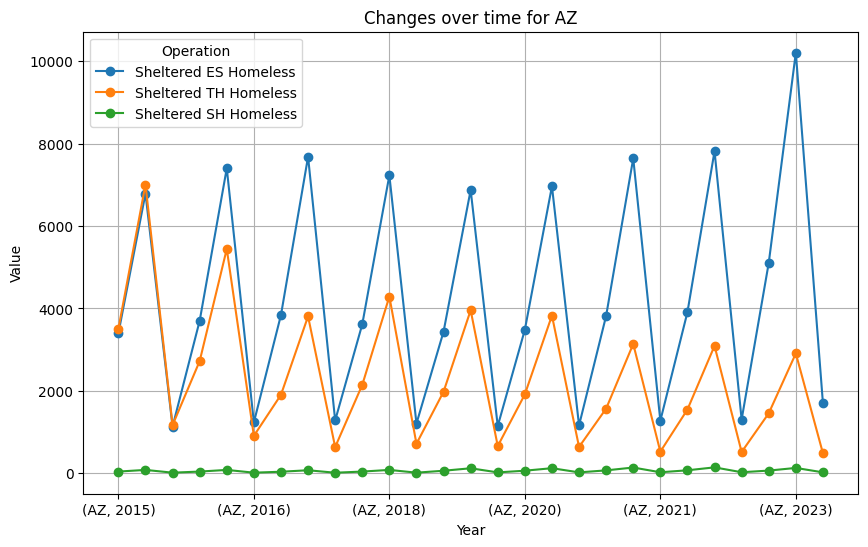

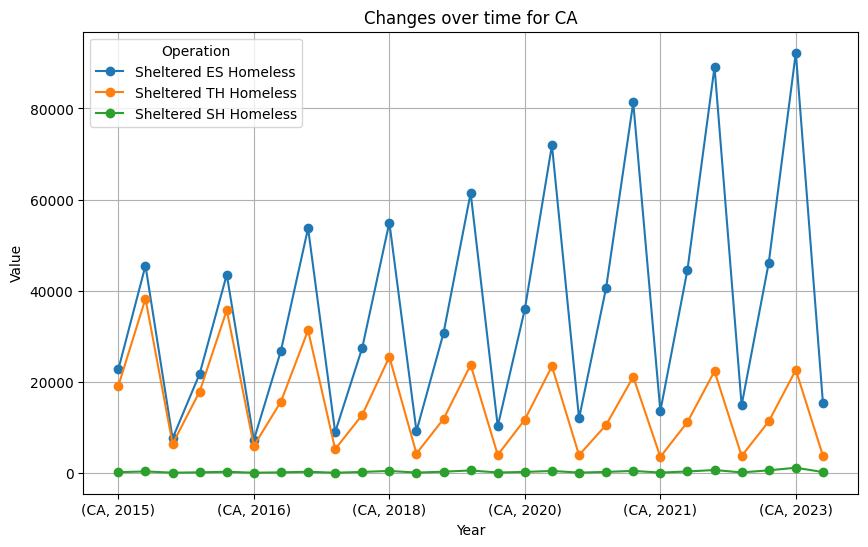

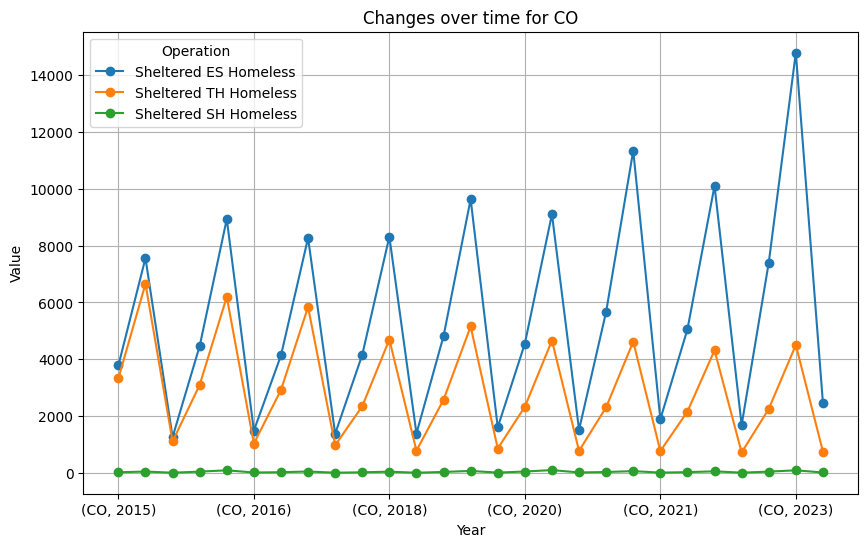

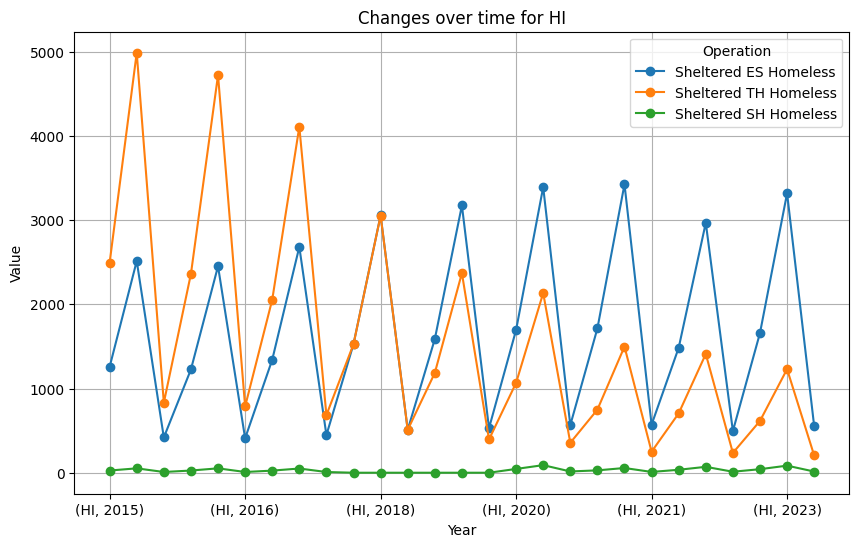

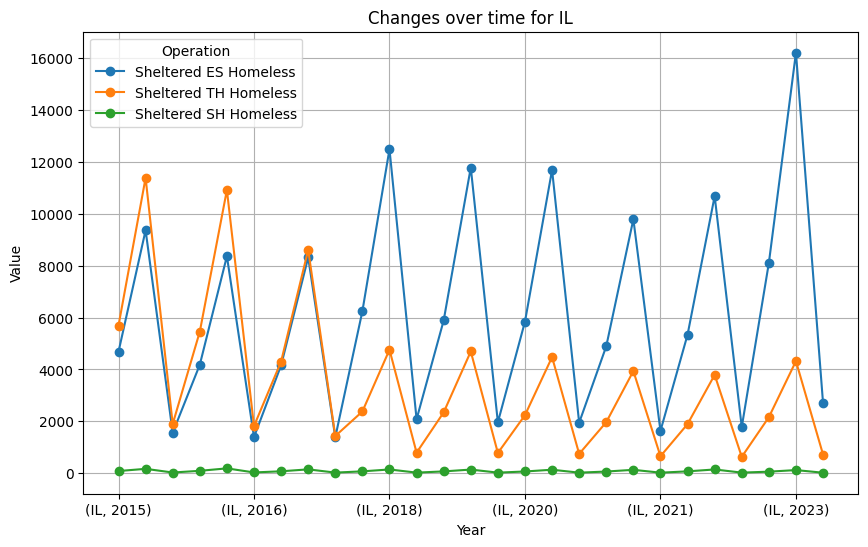

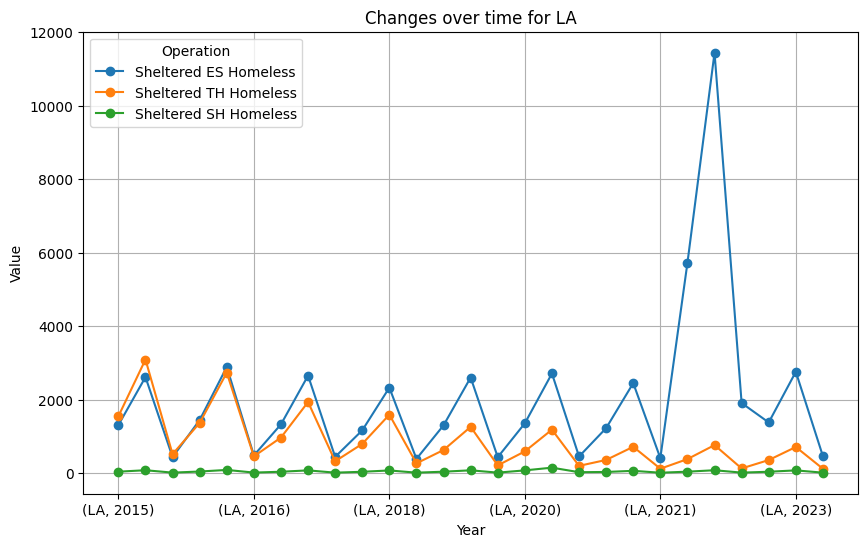

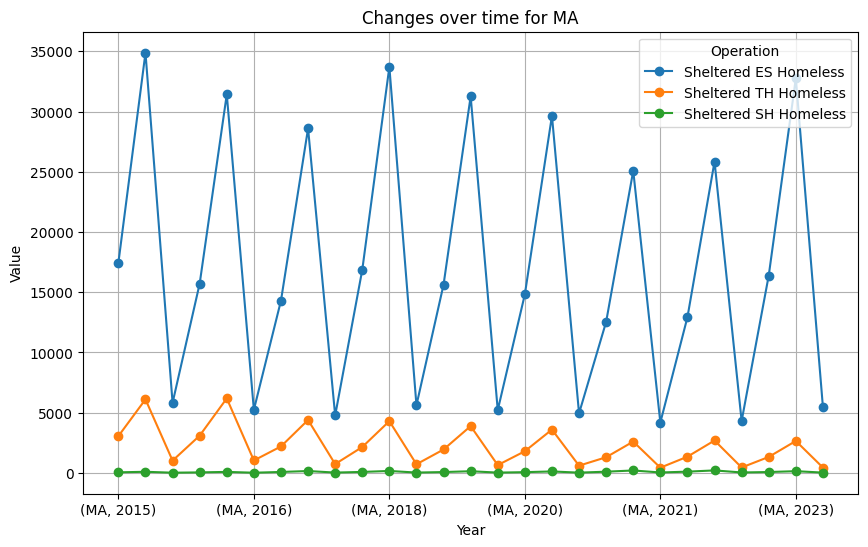

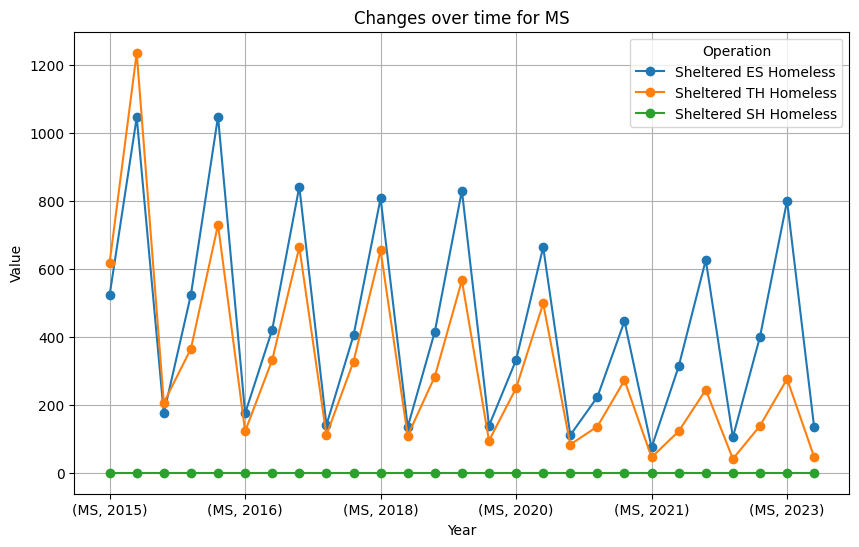

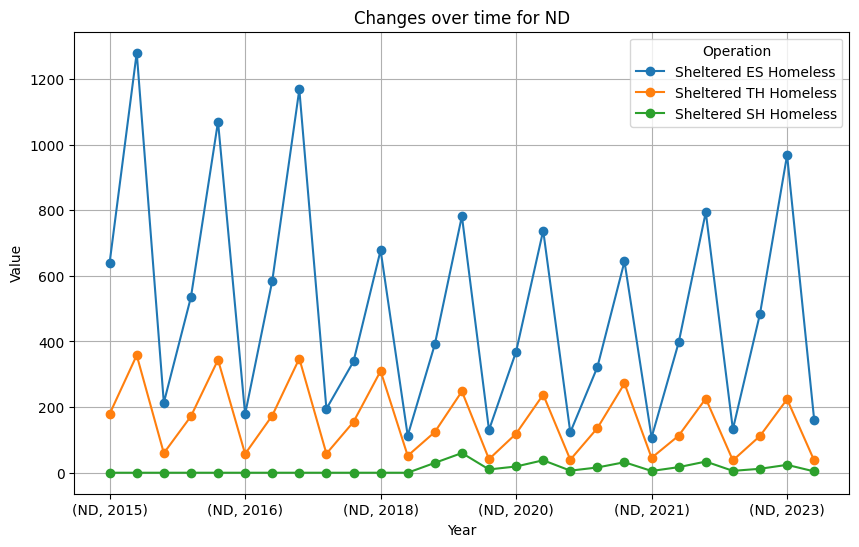

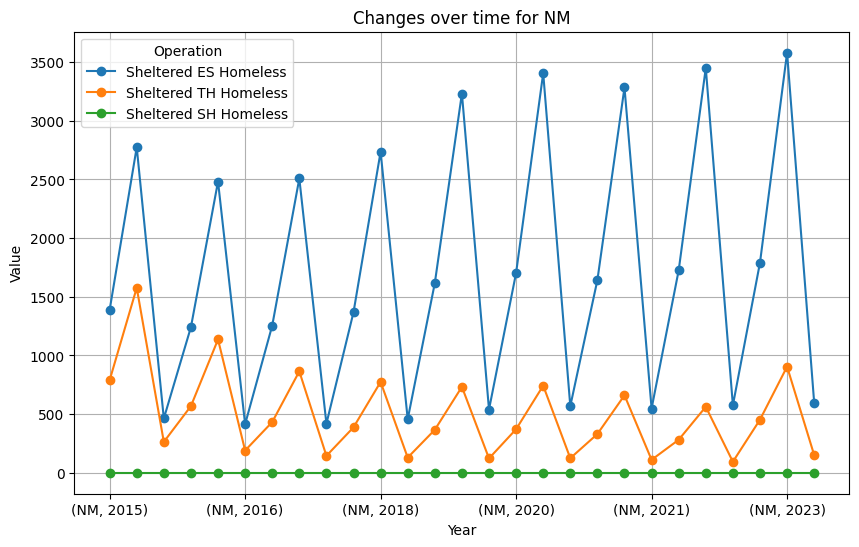

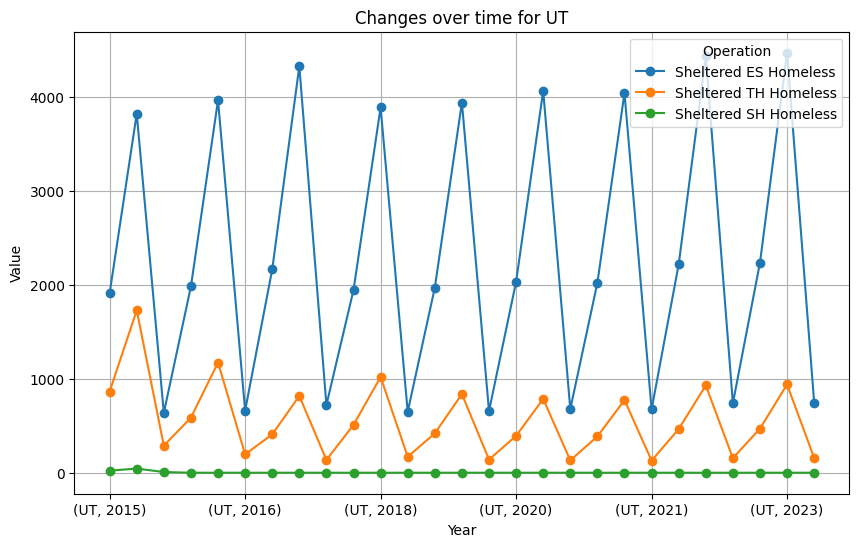

In [123]:
# Create new line plots with cleaned DataFrame 
# Iterate over each state and plot the changes over time
for state, data in focused_df.groupby('State'):
    data.dropna().plot.line(figsize=(10, 6), title=f"Changes over time for {state}", marker='o')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend(title='Operation')
    plt.show()

In [130]:
# Read the CSV files into pandas DataFrames
zori_rentals_df = pd.read_csv('ZORI_rentals.csv')
hud_pip_data_df = pd.read_csv('HUD_PIP_Data.csv')

# Merge the DataFrames on the 'state' and 'statename' columns
merged_df = pd.merge(zori_rentals_df, hud_pip_data_df, left_on='StateName', right_on='State', how='inner')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_data.csv', index=False)
merged_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
0,102001,0,United States,country,NaN,1230.015131,1236.700014,1245.754168,1255.592385,1265.248688,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,102001,0,United States,country,NaN,1230.015131,1236.700014,1245.754168,1255.592385,1265.248688,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,102001,0,United States,country,NaN,1230.015131,1236.700014,1245.754168,1255.592385,1265.248688,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,102001,0,United States,country,NaN,1230.015131,1236.700014,1245.754168,1255.592385,1265.248688,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,102001,0,United States,country,NaN,1230.015131,1236.700014,1245.754168,1255.592385,1265.248688,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10314,394771,733,"Laramie, WY",msa,WY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10315,394771,733,"Laramie, WY",msa,WY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10316,394771,733,"Laramie, WY",msa,WY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10317,394771,733,"Laramie, WY",msa,WY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Select the desired columns
selected_columns_df = ['State', 'Sheltered Total Homeless', 'Sheltered ES Homeless', 'Sheltered TH Homeless', 'Sheltered SH Homeless']
for column in merged_df.columns:
    if 'year' in column.lower() or 'date' in column.lower():
        selected_columns_df.append(column)

# Filter the DataFrame to include only the selected columns
Rentals_Unhoused_df = merged_df[selected_columns_df]

# Save the final DataFrame to a new CSV file
Rentals_Unhoused_df.to_csv('final_merged_data.csv', index=False)
Rentals_Unhoused_df

states_to_include = ['HI','UT','CO','MA','CA','LA','ND','MS','IL','NM','AZ']
final_merge = Rentals_Unhoused_df.loc[states_to_include]
final_merge.reset_index(inplace=True)
final_merge